#Part 1:
###Importing the Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### About the dataset

In [ ]:
df = pd.read_csv("train_data.txt",delimiter=':::',header=None, engine='python')


In [ ]:
df.set_axis(['Serial No.', 'Movie Name', 'Genre','Plot'], axis='columns', inplace=True)
df.head()

<ipython-input-8-3f08a5013b3f>:1: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df.set_axis(['Serial No.', 'Movie Name', 'Genre','Plot'], axis='columns', inplace=True)


,Serial No.,Movie Name,Genre,Plot
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


# Part 2:
###Pre Processing

### Removing the Null Values:

In [ ]:
df.isnull().sum()

Serial No.    0
Movie Name    0
Genre         0
Plot          0
dtype: int64

### Plotting the data type present

Text(0, 0.5, 'Counts')

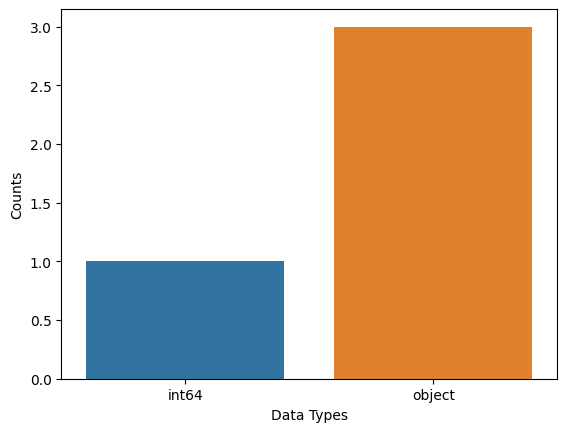

In [ ]:
sns.countplot(x=df.dtypes,data = df)
plt.xlabel("Data Types")
plt.ylabel("Counts")

### Genre Count

In [ ]:
genres=pd.value_counts(df["Genre"])

print('There are ',len(genres), 'different Genres in the dataset:')
print('-'*50)
print(genres)

There are  27 different Genres in the dataset:
--------------------------------------------------
 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: Genre, dtype: int64


### Top 5 Genres

In [ ]:
top_genres = pd.DataFrame(genres[:5]).reset_index()
top_genres.columns = ['genres', 'number_of_movies']
top_genres

,genres,number_of_movies
0,drama,13613
1,documentary,13096
2,comedy,7447
3,short,5073
4,horror,2204


Text(0, 0.5, 'Frequency')

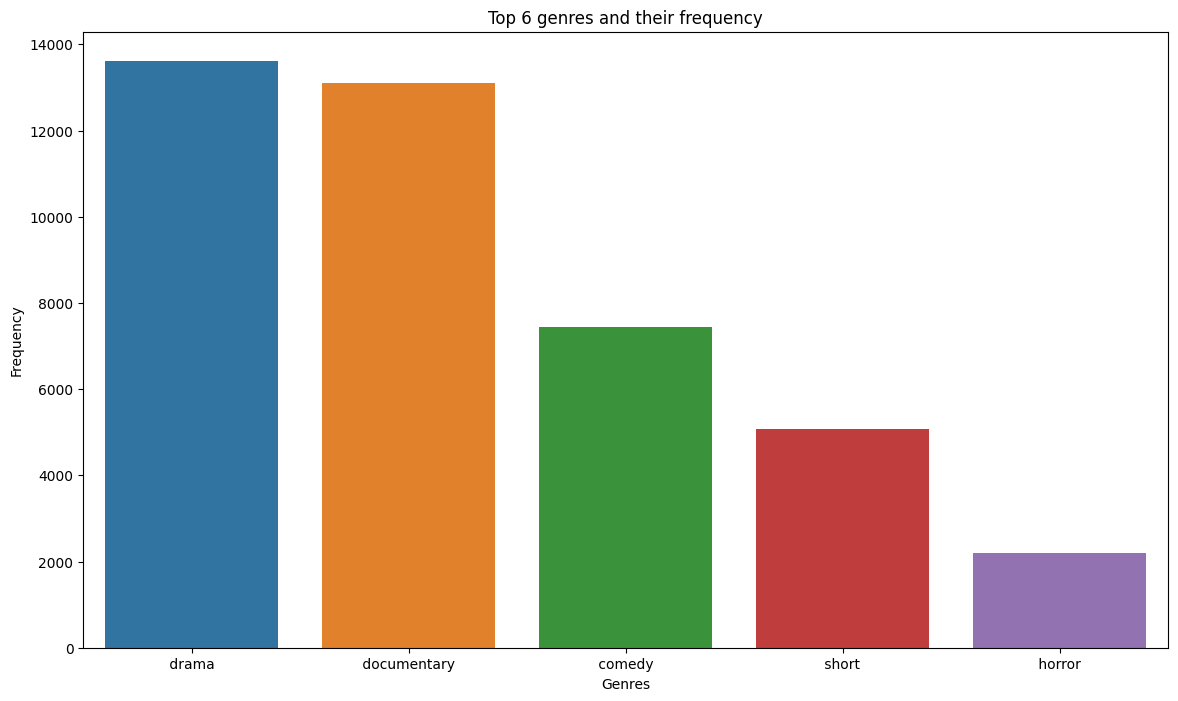

In [ ]:
fig, ax = plt.subplots(figsize=(14,8))

sns.barplot(x= top_genres['genres'], y =top_genres['number_of_movies'])
plt.title('Top 6 genres and their frequency')
plt.xlabel('Genres')
plt.ylabel('Frequency')

### We need to label data(of Top 5 Genres)

In [ ]:
conditions = [df["Genre"]==' drama ', df["Genre"]==' documentary ', df["Genre"]==' comedy ', df["Genre"]==' short ', df["Genre"]==' horror ']
choices = [1,2,3,4,5]
df['labels'] = np.select(conditions, choices,0)

# df.sample(5)
df.head()

,Serial No.,Movie Name,Genre,Plot,labels
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,1
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,0
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,0
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,1


### Remove all the other Labels apart from (1-5)

In [ ]:
 df = (df.loc[df['labels']!=0]).reset_index(drop = True)
 df.head()

,Serial No.,Movie Name,Genre,Plot,labels
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,1
1,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1
2,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,1
3,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...,2
4,7,"""Pink Slip"" (2009)",comedy,In tough economic times Max and Joey have all...,3


### Count of top 5 movies with the label values

In [ ]:
assigned_label = pd.DataFrame(sorted(list(zip(df['Genre'].unique(), df['labels'].unique())), key = lambda x : x[1], reverse = False), columns = ['genres', 'labels'])
pd.merge(assigned_label, top_genres)

,genres,labels,number_of_movies
0,drama,1,13613
1,documentary,2,13096
2,comedy,3,7447
3,short,4,5073
4,horror,5,2204


### Dropping unnessecary data

In [ ]:
# df.drop(columns = ['Serial No.'], axis = 1, inplace = True)
df.head()

,Serial No.,Movie Name,Genre,Plot,labels
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,1
1,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1
2,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,1
3,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...,2
4,7,"""Pink Slip"" (2009)",comedy,In tough economic times Max and Joey have all...,3


In [ ]:
df.head()

,Serial No.,Movie Name,Genre,Plot,labels
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,1
1,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1
2,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,1
3,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...,2
4,7,"""Pink Slip"" (2009)",comedy,In tough economic times Max and Joey have all...,3


### Finding total words present in the Plot column

In [ ]:
def word_length(text):
    num_of_words = 0
    for row in text:
        words = [word for word in row.split(' ')]
        num_of_words += len(words)
    return num_of_words

total_words = word_length(df['Plot'])
print(total_words)

4300767


### Unique Words present in Plot

In [ ]:
def unique_word_length(text):
    unique_words = set()
    for row in text:
        words = [word for word in row.split(' ')]
        unique_words.update(words)
    return len(unique_words)
unique_words = unique_word_length(df['Plot'])
print(unique_words)

252832


### Creating a new dataframe

In [ ]:
new_df = df.copy(deep = True)

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()  # Split the text into words
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

new_df['Plot'] = df['Plot'].apply(remove_stopwords)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
print(new_df['Plot'])

0        Listening conversation doctor parents, 10-year...
1        help unemployed father make ends meet, Edith t...
2        film's title refers un-recovered bodies ground...
3        Quality Control consists series 16mm single ta...
4        tough economic times Max Joey run ideas until,...
                               ...                        
41428    man woman meet identification spouses' dead bo...
41429    short-lived NBC live sitcom centered Bonino, w...
41430    NEXT Generation EXPLOITATION. sisters Kapa - B...
41431    Ze bestaan echt, stand-up comedy growing facin...
41432    Walter Vivian live country difficult time keep...
Name: Plot, Length: 41433, dtype: object


### Finding the total words after removing the stopwords

In [ ]:
def word_length(text):
    num_of_words = 0
    for row in text:
        words = [word for word in row.split(' ')]
        num_of_words += len(words)
    return num_of_words

cleansed_total_words = word_length(new_df['Plot'])
print(cleansed_total_words)

2442712


### Unique words present after removing the stopwords

In [ ]:
def unique_word_length(text):
    unique_words = set()
    for row in text:
        words = [word for word in row.split(' ')]
        unique_words.update(words)
    return len(unique_words)

cleansed_unique_words = unique_word_length(new_df['Plot'])
print(cleansed_unique_words)

252283


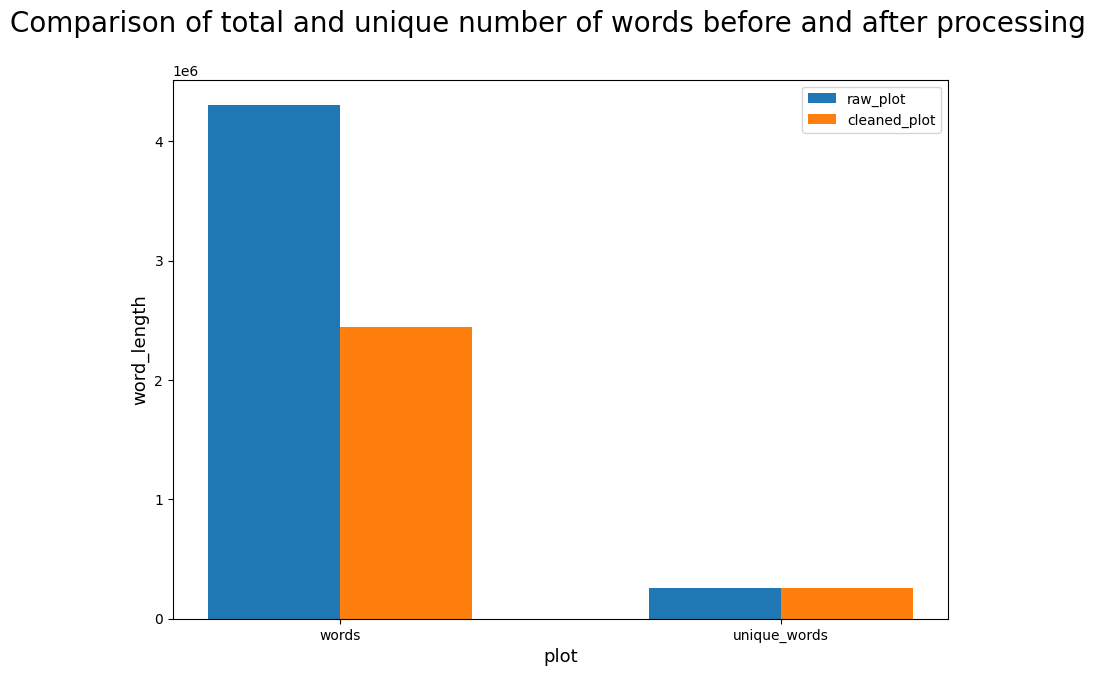

In [ ]:
plot_length = [[total_words, cleansed_total_words], [unique_words, cleansed_unique_words]]
df_len = pd.DataFrame(plot_length, columns = ['num_of_words', 'num_of_unique_words'])
df_len['index'] = ['raw_plot', 'cleaned_plot']

y1 = df_len['num_of_words']
y2 = df_len['num_of_unique_words']

plt.figure(figsize=(10,7))
ind = np.arange(2)

width = 0.3

# Plotting
plt.bar(ind, y1, width, label='raw_plot')
plt.bar(ind + width, y2, width, label='cleaned_plot')

plt.xlabel('plot', size = 13)
plt.ylabel('word_length', size = 13)
plt.suptitle('Comparison of total and unique number of words before and after processing', size = 20)
plt.xticks(ind + width / 2, ('words', 'unique_words'))
plt.legend(loc='best')
plt.show()


In [ ]:
df_len

,num_of_words,num_of_unique_words,index
0,4300767,2442712,raw_plot
1,252832,252283,cleaned_plot


In [ ]:
new_df.head()

,Serial No.,Movie Name,Genre,Plot,labels
0,1,Oscar et la dame rose (2009),drama,"Listening conversation doctor parents, 10-year...",1
1,4,The Secret Sin (1915),drama,"help unemployed father make ends meet, Edith t...",1
2,5,The Unrecovered (2007),drama,film's title refers un-recovered bodies ground...,1
3,6,Quality Control (2011),documentary,Quality Control consists series 16mm single ta...,2
4,7,"""Pink Slip"" (2009)",comedy,"tough economic times Max Joey run ideas until,...",3


### Frequent words occuring in Drama

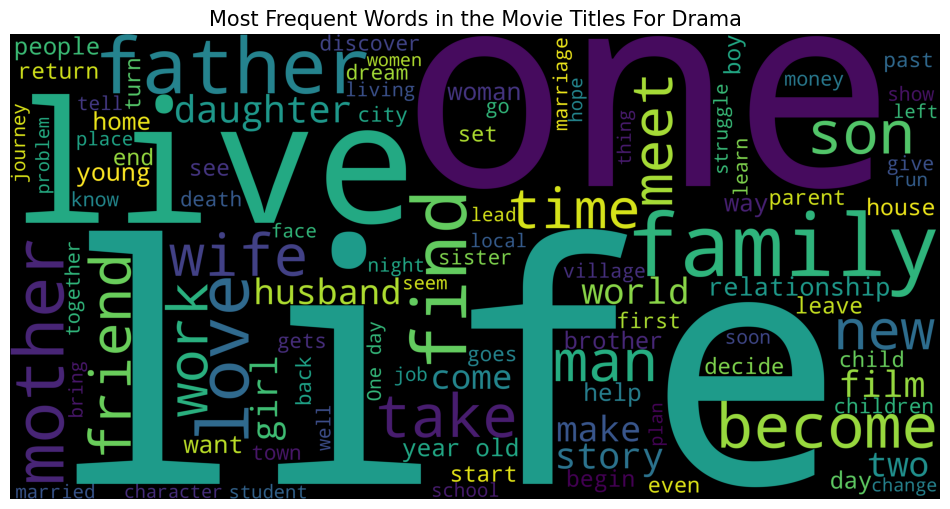

In [ ]:
import itertools
from sklearn.feature_extraction.text import CountVectorizer   # it converts words into vectors
from wordcloud import WordCloud,STOPWORDS
drama_plot = new_df.loc[new_df['labels'] == 1, ['Plot', 'Movie Name']]   #fixing the location of the rows values as 1 and fetching the Plot and Title values
drama_plotlist = [x for x in drama_plot['Plot'].str.split()]
drama_plotlist = list(itertools.chain(*drama_plotlist)) #This is a common operation when you have a list of lists and want to convert it into a single flat list containing all the elements

count = CountVectorizer()
docs       = count.fit_transform(drama_plotlist)
features   = count.get_feature_names_out()

title_corpus = ' '.join(drama_plotlist)
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000, random_state = 42, max_words = 100).generate(title_corpus)

# Plot the wordcloud
fig, ax = plt.subplots(figsize=(12,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.title('Most Frequent Words in the Movie Titles For Drama', fontsize = 15)
plt.show()


### Frequent words occuring in Documentary

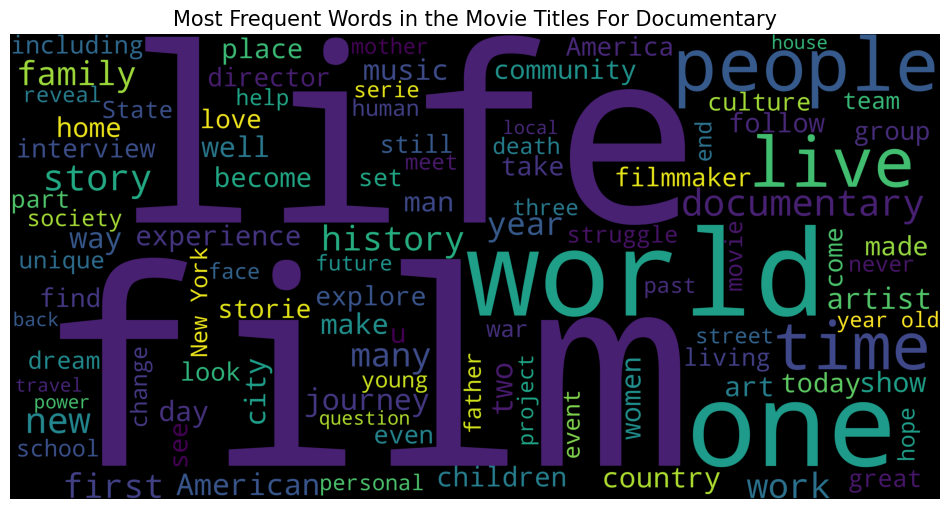

In [ ]:
drama_plot = new_df.loc[new_df['labels'] == 2, ['Plot', 'Movie Name']]   #fixing the location of the rows values as 1 and fetching the Plot and Title values
drama_plotlist = [x for x in drama_plot['Plot'].str.split()]
drama_plotlist = list(itertools.chain(*drama_plotlist)) #This is a common operation when you have a list of lists and want to convert it into a single flat list containing all the elements

count = CountVectorizer()
docs       = count.fit_transform(drama_plotlist)
features   = count.get_feature_names_out()

title_corpus = ' '.join(drama_plotlist)
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000, random_state = 42, max_words = 100).generate(title_corpus)

# Plot the wordcloud
fig, ax = plt.subplots(figsize=(12,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.title('Most Frequent Words in the Movie Titles For Documentary', fontsize = 15)
plt.show()

### Frequent words occuring in Comedy

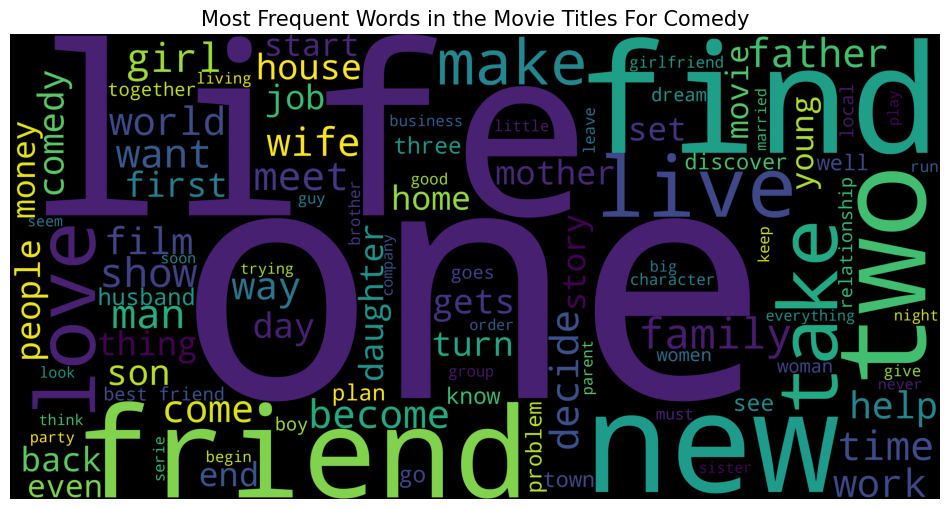

In [ ]:
drama_plot = new_df.loc[new_df['labels'] == 3, ['Plot', 'Movie Name']]   #fixing the location of the rows values as 1 and fetching the Plot and Title values
drama_plotlist = [x for x in drama_plot['Plot'].str.split()]
drama_plotlist = list(itertools.chain(*drama_plotlist)) #This is a common operation when you have a list of lists and want to convert it into a single flat list containing all the elements

count = CountVectorizer()
docs       = count.fit_transform(drama_plotlist)
features   = count.get_feature_names_out()

title_corpus = ' '.join(drama_plotlist)
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000, random_state = 42, max_words = 100).generate(title_corpus)

# Plot the wordcloud
fig, ax = plt.subplots(figsize=(12,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.title('Most Frequent Words in the Movie Titles For Comedy', fontsize = 15)
plt.show()

### Frequent words occuring in Comedy

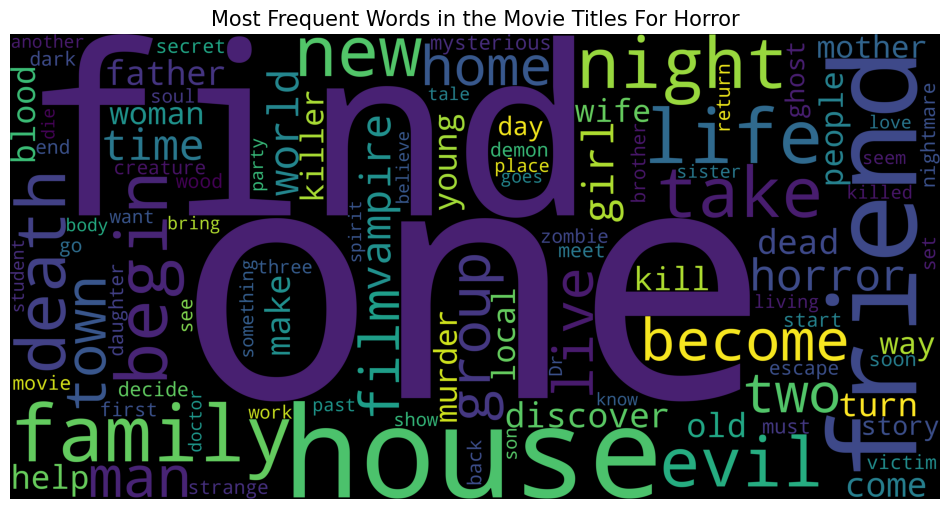

In [ ]:
drama_plot = new_df.loc[new_df['labels'] == 5, ['Plot', 'Movie Name']]   #fixing the location of the rows values as 1 and fetching the Plot and Title values
drama_plotlist = [x for x in drama_plot['Plot'].str.split()]
drama_plotlist = list(itertools.chain(*drama_plotlist)) #This is a common operation when you have a list of lists and want to convert it into a single flat list containing all the elements

count = CountVectorizer()
docs       = count.fit_transform(drama_plotlist)
features   = count.get_feature_names_out()

title_corpus = ' '.join(drama_plotlist)
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000, random_state = 42, max_words = 100).generate(title_corpus)

# Plot the wordcloud
fig, ax = plt.subplots(figsize=(12,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.title('Most Frequent Words in the Movie Titles For Horror', fontsize = 15)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X = new_df['Plot']
y = new_df['labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state = 42, stratify = y)  # stratify= y This is particularly useful when you have imbalanced classes.
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31074,) (10359,) (31074,) (10359,)


**Using TfidfVectorizer on the independent variable**

 Converts text documents into numbers that a machine learning model can understand. It does this by giving more weight to words that are important in a document but not too common across all documents.



1.   Term Frequency (TF):

     How often a word appears in a document. If a word appears frequently in a document, its TF value is higher for that document.

2.   Inverse Document Frequency (IDF):

     How unique or important a word is across all documents.
     If a word is common across all documents, its IDF value is lower.

3.  TF-IDF: Combining TF and IDF:

    Words that are frequent in a document but not common across all documents get higher TF-IDF values.



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range = (1,1), max_df=.85, min_df=15, lowercase=False)
#ngram_range=(1,1) = unigram,  ignore (words) that have a document frequency strictly higher or lower than the given threshold,

tfidf_Xtr = vectorizer.fit_transform(X_train)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_grid = {
    'penalty' : ['l1', 'l2', 'none'],
    'C' : [1.0, 1e2, 1e4, 1e10],
    'class_weight' : ['balanced', None],
    'solver' : ['lbfgs', 'liblinear'],
    'multi_class' : ['ovr', 'multinomial']
}
logreg = LogisticRegression(random_state = 42)
logreg_tfidf_gs = GridSearchCV(logreg, param_grid = lr_grid, cv = 5)
logreg_tfidf_gs.fit(tfidf_Xtr, y_train)
print(logreg_tfidf_gs.best_score_)
model_resultstfidf['Logistic Regression'] = logreg_tfidf_gs.best_score_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:


0.7116239534893957
